In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Cargar dataset


In [12]:
path = Path("data/public_dataset.csv")
df = pd.read_csv(path)
df

,0,1,2,3,4,5,6,7,8,9,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,y
0,0.206982,0.528190,0.094388,0.710786,0.293535,0.053518,1.560452,0.038778,0.204675,3.899944,...,0.055625,1.011518,0.000000,1.827512,0.0,0.000000,0.000000,0.000000,2.561583,0
1,0.000000,3.788149,0.333648,0.315161,0.453316,0.016852,2.223108,0.000000,0.610962,1.137982,...,0.028465,0.364374,0.000000,3.973356,0.0,0.000000,0.000000,0.000000,2.067093,0
2,0.000000,0.000000,0.000000,0.529249,0.041982,0.000000,0.945250,0.000000,0.000000,4.539628,...,0.097187,1.206422,0.000000,1.419718,0.0,0.000000,0.076433,0.051839,1.253428,0
3,0.000000,2.260482,0.000000,1.110543,0.227674,0.148470,1.177623,0.000000,0.263831,1.972179,...,0.000000,1.529947,0.000000,2.732438,0.0,0.203275,0.000000,0.000000,1.615122,0
4,0.000000,1.019531,0.140975,0.103500,0.147774,0.000000,1.594505,0.000000,0.027189,1.792744,...,0.000000,0.669012,0.000000,2.428372,0.0,0.024477,0.000000,0.000000,2.408716,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.000000,2.773876,0.000000,1.173736,0.056142,0.027190,1.866909,0.000000,0.744645,1.921275,...,0.002894,0.649495,0.000000,3.466795,0.0,0.585368,0.000000,0.000000,1.109444,0
764,0.010030,1.238817,0.219678,0.456806,0.428705,0.033088,2.869872,0.000000,0.029027,2.031123,...,0.255414,2.250038,0.027145,4.378890,0.0,0.053082,0.000000,0.000000,2.385835,1
765,0.012415,0.000000,0.000000,0.000000,0.000000,0.283645,1.778317,0.000000,0.249039,4.266367,...,0.000889,0.952877,0.000000,3.435471,0.0,0.037277,0.000000,0.016627,1.866090,0
766,0.000000,1.332153,0.065212,0.002797,0.492544,0.135540,2.798263,0.000000,0.217823,4.044279,...,0.020232,1.278484,0.000000,4.644437,0.0,0.150434,0.217846,0.000000,2.673589,0


# Separar X / y (en variables)

In [13]:
y = df["y"]
X = df.drop(columns=["y"])

summary_text = {
    "rows": df.shape[0],
    "cols": df.shape[1],
    "y": "y",
    "n_duplicates": int(df.duplicated().sum())
}
summary_text

{'rows': 768, 'cols': 1281, 'y': 'y', 'n_duplicates': 7}

# Tipos y nulos (variables)

In [14]:
dtypes_df = df.dtypes.rename("dtype").reset_index().rename(columns={"index": "column"})
missing_df = (
    df.isna().sum().rename("n_missing").to_frame()
    .assign(pct_missing=lambda x: (x["n_missing"]/len(df)*100).round(3))
    .reset_index().rename(columns={"index": "column"})
    .sort_values("n_missing", ascending=False)
)
missing_df

,column,n_missing,pct_missing
0,0,0,0.0
641,641,0,0.0
859,859,0,0.0
858,858,0,0.0
857,857,0,0.0
...,...,...,...
426,426,0,0.0
425,425,0,0.0
424,424,0,0.0
423,423,0,0.0


# Distribución de la etiqueta (variable)

In [18]:
label_dist_df = (
    df['y'].value_counts(dropna=False).sort_index()
    .rename("count").to_frame()
    .assign(pct=lambda x: (x["count"] / x["count"].sum() * 100).round(3))
    .reset_index().rename(columns={"index": "label"})
)
label_dist_df

,y,count,pct
0,0,603,78.516
1,1,165,21.484


# Numéricas / Categóricas

In [22]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

# Descriptivos numéricos

In [23]:
desc_num = df[num_cols].describe().T if num_cols else pd.DataFrame()
desc_num

,count,mean,std,min,25%,50%,75%,max
0,768.0,0.044279,0.099789,0.0,0.000000,0.000000,0.049107,1.045536
1,768.0,0.714483,0.840349,0.0,0.023971,0.359349,1.171979,3.915367
2,768.0,0.044680,0.084322,0.0,0.000000,0.005103,0.053110,0.914319
3,768.0,0.217076,0.324429,0.0,0.000000,0.077859,0.315718,2.100850
4,768.0,0.163250,0.271020,0.0,0.000000,0.018121,0.211826,1.666200
...,...,...,...,...,...,...,...,...
1275,768.0,0.000226,0.002895,0.0,0.000000,0.000000,0.000000,0.062493
1276,768.0,0.051425,0.125576,0.0,0.000000,0.002428,0.045566,1.337208
1277,768.0,0.018046,0.040488,0.0,0.000000,0.000000,0.014532,0.342749
1278,768.0,0.065468,0.179526,0.0,0.000000,0.000000,0.036031,1.412270


# Outliers por IQR (variable)

In [52]:
def iqr_outlier_counts(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    if iqr == 0 or np.isnan(iqr):
        return 0, 0
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    mild = ((series < lower) | (series > upper)).sum()
    lower_e = q1 - 3.0 * iqr
    upper_e = q3 + 3.0 * iqr
    extreme = ((series < lower_e) | (series > upper_e)).sum()
    return int(mild), int(extreme)

outlier_rows = []
for c in num_cols:
    s = df[c].dropna()
    mild, extreme = iqr_outlier_counts(s)
    outlier_rows.append({"column": c, "mild_outliers": mild, "extreme_outliers": extreme})

outliers_df = pd.DataFrame(outlier_rows).sort_values(
    ["extreme_outliers","mild_outliers"], ascending=False
) if num_cols else pd.DataFrame()
outliers_df.describe()
cols_ext = outliers_df[outliers_df["mild_outliers"] > 0].copy()
n_cols_ext = len(cols_ext)
cols_lista = cols_ext["column"].tolist()

print("N columnas con extremos:", n_cols_ext)
print("Columnas:", cols_lista)

print(cols_ext.sort_values("mild_outliers", ascending=False).head(50))

N columnas con extremos: 777
Columnas: ['415', '281', '578', '648', '1245', '1061', '275', '387', '724', '486', '1065', '543', '1113', '1171', '1096', '624', '476', '1169', '205', '597', '47', '757', '764', '639', '1210', '607', '700', '263', '930', '445', '383', '1196', '199', '410', '632', '871', '850', '220', '113', '46', '909', '658', '89', '1027', '1168', '901', '572', '340', '1131', '556', '781', '307', '84', '531', '921', '999', '53', '315', '482', '479', '806', '910', '150', '671', '498', '975', '537', '1218', '132', '706', '1269', '1057', '704', '893', '363', '883', '908', '560', '1062', '1121', '139', '95', '516', '422', '547', '487', '483', '993', '898', '1109', '87', '240', '539', '241', '75', '433', '731', '935', '709', '411', '1149', '62', '221', '1034', '94', '1088', '561', '194', '496', '557', '159', '164', '161', '100', '223', '685', '616', '1277', '997', '558', '1278', '741', '1266', '854', '859', '1157', '70', '182', '889', '1005', '905', '105', '1164', '956', '749',

# Correlación con y (variable)

In [57]:
corr_series = df[num_cols + ["y"]].corr(numeric_only=True)["y"].drop(labels=["y"])
corr_df = (
    corr_series.sort_values(ascending=False)
    .rename("pearson_corr_with_label").to_frame()
    .reset_index().rename(columns={"index": "feature"})
)
corr_df

# Umbrales (puedes ajustarlos)
thr_high = 0.40   # >= 0.40 → alta
thr_med  = 0.10   # [0.10, 0.40) → media
# < 0.10 → baja

# Añadir |corr| y bucket
corr_df = corr_df.assign(abs_corr=lambda d: d["pearson_corr_with_label"].abs())

# Opción A: con pd.cut
bins = [0.0, thr_med, thr_high, 1.0]  # rangos en [0,1]
labels = ["baja", "media", "alta"]
corr_df["bucket"] = pd.cut(
    corr_df["abs_corr"], bins=bins, labels=labels, include_lowest=True, right=False
)

# Conteo por categoría
conteo = corr_df["bucket"].value_counts().reindex(labels, fill_value=0)
print("Conteo por fuerza de correlación (|r|):")
print(conteo)

# (Opcional) listas de features por categoría
feats_alta  = corr_df.loc[corr_df["bucket"] == "alta",  "feature"].tolist()
feats_media = corr_df.loc[corr_df["bucket"] == "media", "feature"].tolist()
feats_baja  = corr_df.loc[corr_df["bucket"] == "baja",  "feature"].tolist()

print("\nEjemplo (primeros 50 de cada grupo):")
print("Alta :", feats_alta[:50])
print("Media:", feats_media[:50])
print("Baja :", feats_baja[:50])

Conteo por fuerza de correlación (|r|):
bucket
baja     672
media    569
alta      24
Name: count, dtype: int64

Ejemplo (primeros 50 de cada grupo):
Alta : ['794', '1241', '533', '1279', '1165', '396', '128', '568', '995', '711', '813', '183', '245', '1115', '453', '71', '336', '147', '1214', '318', '365', '816', '782', '248']
Media: ['316', '458', '451', '755', '824', '302', '11', '6', '914', '634', '576', '1212', '1026', '703', '1066', '385', '238', '272', '937', '895', '68', '432', '1207', '92', '832', '1052', '828', '268', '16', '1213', '1033', '870', '1151', '211', '622', '837', '4', '341', '980', '1119', '468', '641', '994', '955', '160', '504', '522', '185', '1125', '605']
Baja : ['1177', '1230', '1', '1148', '8', '293', '1138', '1084', '877', '626', '539', '279', '85', '952', '534', '1057', '978', '164', '306', '80', '655', '1147', '518', '1251', '202', '1088', '1149', '91', '1015', '173', '230', '1080', '899', '519', '623', '225', '1220', '1142', '524', '373', '1224', '790', 

# Resumen

In [29]:
print("=== RESUMEN EDA (en memoria) ===")
print(f"Filas, Columnas: {df.shape}")
print(f"Etiqueta detectada: y")
print("\nTop 10 columnas con más nulos:")
print(missing_df.head(10).to_string(index=False))

if "count" in label_dist_df.columns:
    print("\nDistribución de etiqueta:")
    print(label_dist_df.to_string(index=False))

if not outliers_df.empty:
    print("\nTop 10 columnas con más outliers (IQR):")
    print(outliers_df.head(10).to_string(index=False))

if "pearson_corr_with_label" in corr_df.columns:
    print("\nTop 10 correlaciones absolutas con la etiqueta:")
    corr_abs = corr_df.assign(abs_corr=lambda d: d["pearson_corr_with_label"].abs()).sort_values("abs_corr", ascending=False)
    print(corr_abs.head(10)[["feature","pearson_corr_with_label","abs_corr"]].to_string(index=False))

=== RESUMEN EDA (en memoria) ===
Filas, Columnas: (768, 1281)
Etiqueta detectada: y

Top 10 columnas con más nulos:
column  n_missing  pct_missing
     0          0          0.0
   641          0          0.0
   859          0          0.0
   858          0          0.0
   857          0          0.0
   856          0          0.0
   855          0          0.0
   854          0          0.0
   853          0          0.0
   852          0          0.0

Distribución de etiqueta:
 y  count    pct
 0    603 78.516
 1    165 21.484

Top 10 columnas con más outliers (IQR):
column  mild_outliers  extreme_outliers
   415            192               191
   281            191               190
   578            190               190
   648            189               187
  1245            189               185
  1061            189               184
   275            186               181
   387            189               178
   724            186               178
   486            184   

# 1) Histograma de las 3 columnas con más outliers mild (si existen)

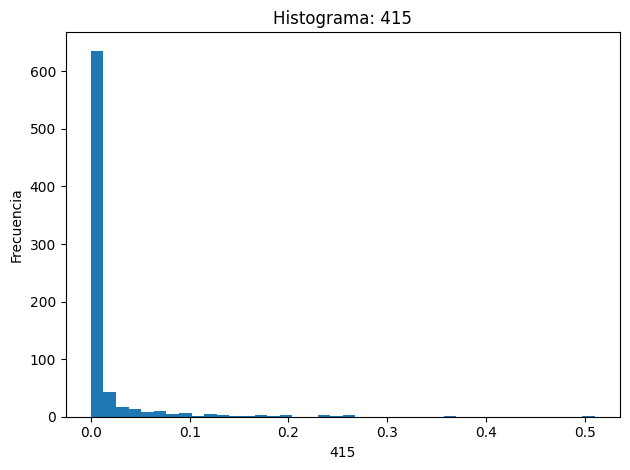

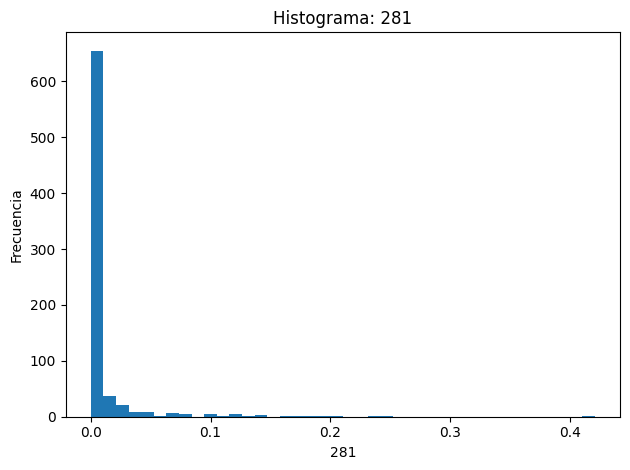

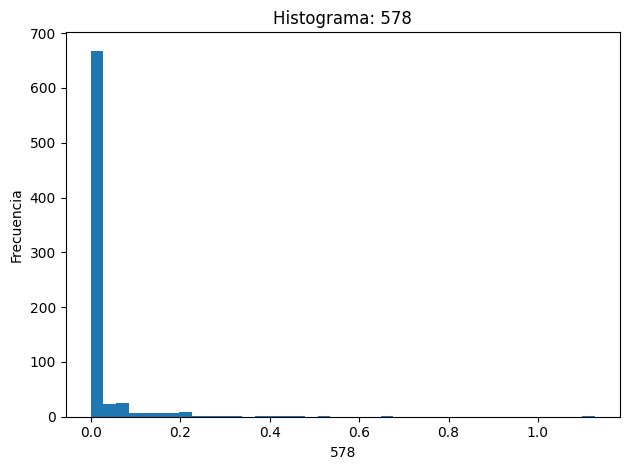

In [33]:
top_feats = outliers_df.sort_values("mild_outliers", ascending=False)["column"].head(3).tolist() if not outliers_df.empty else num_cols[:3]
for c in top_feats:
    if c in df.columns and pd.api.types.is_numeric_dtype(df[c]):
        plt.figure()
        plt.hist(df[c].dropna().values, bins=40)
        plt.title(f"Histograma: {c}")
        plt.xlabel(c)
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()


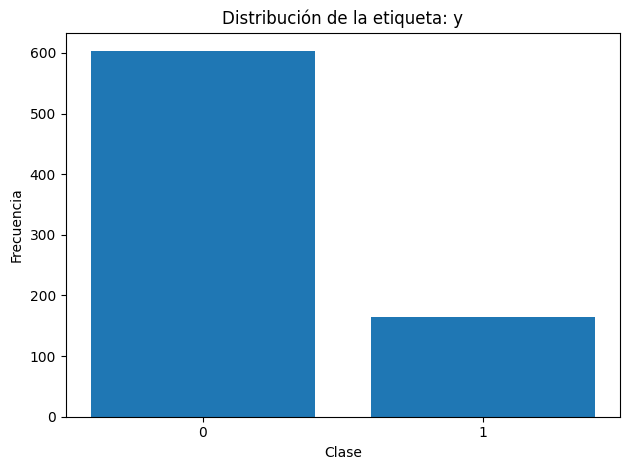

In [35]:
if "count" in label_dist_df.columns:
    plt.figure()
    labels = label_dist_df["y"].astype(str).values
    counts = label_dist_df["count"].values
    plt.bar(labels, counts)
    plt.title(f"Distribución de la etiqueta: y")
    plt.xlabel("Clase")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()